<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Clustering%20and%20Unsupervised%20Learning/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

## 1. Understand K-means

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

We randomly generate some groups of data in 2-d space

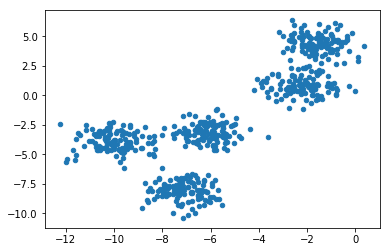

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=600, centers=5, cluster_std=0.8, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=20);

Then we run the K-means algorithm, find out the centroid of each group of data, and make predictions.

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
kmeans.cluster_centers_

array([[-7.12477649, -8.09803975],
       [-1.55383662,  4.44779912],
       [-9.98787166, -3.88556349],
       [-6.11398201, -3.11924685],
       [-2.17812827,  0.7903456 ]])

Finally we plot the data with predicted values in differnt colors, and show centroid in red circle.

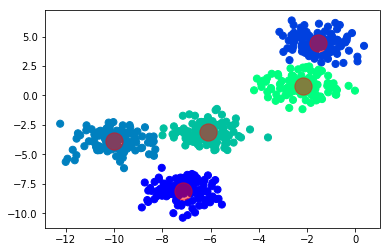

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5);

## 2. K-means for image compression

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [0]:
from sklearn.datasets import load_sample_image
image = load_sample_image("china.jpg")


In [7]:
data = image / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
print( data.shape )
reduced_colors = 16

(273280, 3)


In [0]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(reduced_colors)
kmeans.fit(data)

centers = kmeans.cluster_centers_
reduced_color_image = centers[kmeans.predict(data)]


In [9]:
kmeans.cluster_centers_

array([[0.94033173, 0.95661217, 0.98213376],
       [0.33058581, 0.14751069, 0.10578552],
       [0.5654861 , 0.53043083, 0.42093626],
       [0.75026774, 0.83806749, 0.93767511],
       [0.05831788, 0.05270933, 0.02983793],
       [0.45095777, 0.44199849, 0.20826043],
       [0.32520255, 0.32010655, 0.25546194],
       [0.8524839 , 0.60491273, 0.4405133 ],
       [0.57763303, 0.62540119, 0.61314831],
       [0.14751857, 0.13866388, 0.10599238],
       [0.41705384, 0.42588416, 0.37476339],
       [0.80166038, 0.82261613, 0.83974974],
       [0.25058626, 0.25035282, 0.16141643],
       [0.85356009, 0.90738771, 0.96580995],
       [0.5834873 , 0.31293591, 0.22269772],
       [0.70694856, 0.74520351, 0.7332758 ]])

In [0]:
def plot_image_vs_reduced(image, reduced_image):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(image)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(reduced_image)
    ax[1].set_title('Reduced-color Image', size=16);
    plt.show()

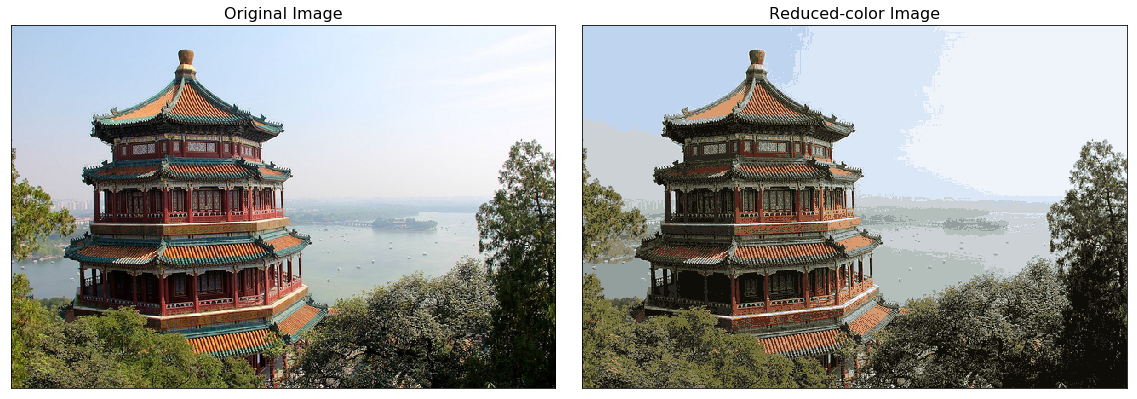

In [11]:
image_recolored = reduced_color_image.reshape(image.shape)
plot_image_vs_reduced( image, image_recolored )

In [0]:
from mpl_toolkits.mplot3d import Axes3D

def plot_colors_in_colorspace( image, reduced_colors ):

    r = []
    g = []
    b = []

    for line in image:
      for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        
    fig, ax = plt.subplots(1, figsize=(12, 10))

    ax = Axes3D(fig)
    ax.scatter(r[::16], g[::16], b[::16], cmap='viridis', lw=0, s=20, alpha=0.3, label='origian color')
    ax.scatter(reduced_colors[:, 0], reduced_colors[:, 1], reduced_colors[:, 2], c='r', lw=10, s=300, alpha=0.9, label='reduced color')
    ax.set_xlabel('R color', fontsize=20)
    ax.set_ylabel('G color', fontsize=20)
    ax.set_zlabel('B color', fontsize=20)
    ax.set_title('Original color space: 16,777,216 colors', fontsize=24)
    ax.legend(loc='lower left', fontsize=16)

    plt.show()        

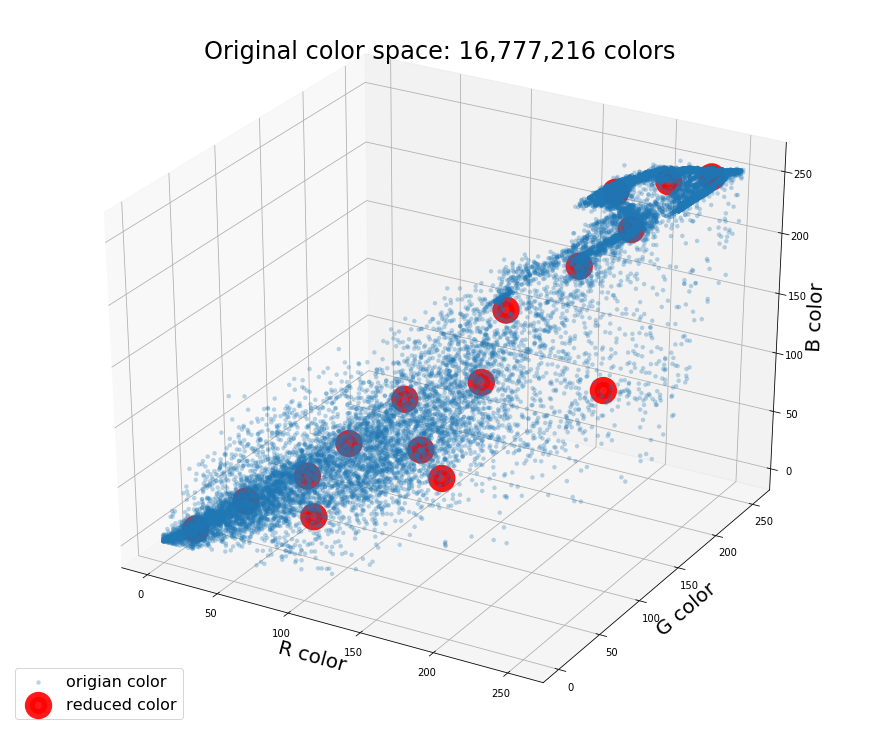

In [15]:
plot_colors_in_colorspace( image = image, reduced_colors = centers * 255 )
